In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics


In [2]:
data = pd.read_csv("salary_data.csv")

In [8]:
print(list(data.columns))


['YearsExperience', 'Salary($)']


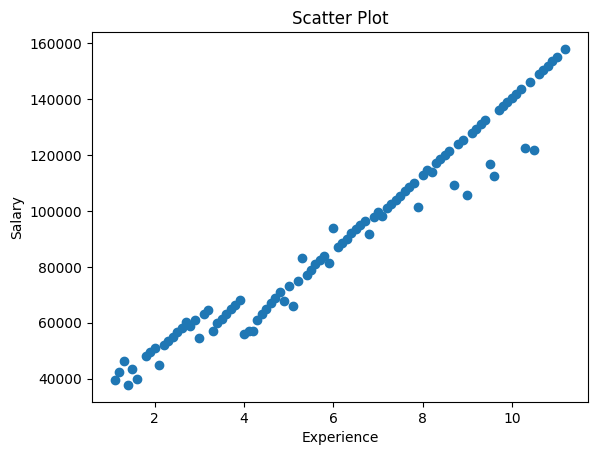

In [9]:
plt.scatter(data["YearsExperience"], data["Salary($)"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X = data[["YearsExperience"]]   
y = data["Salary($)"]           

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [14]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(80, 1) (20, 1)
(80,) (20,)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(X_test)


In [25]:
model.predict([[5]])   


C:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([77881.02105019])

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9693547045529097


In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 33871788.37105676


In [20]:
import numpy as np

rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 5819.947454320937


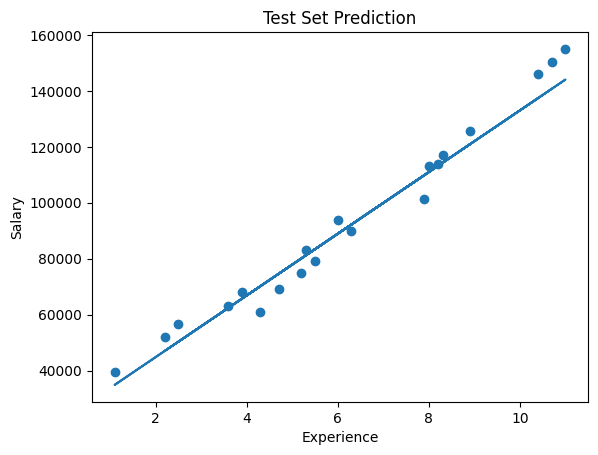

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Test Set Prediction")
plt.show()


In [22]:
import os

os.makedirs("submission", exist_ok=True)


In [23]:
with open("submission/model_performance.txt", "w") as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"Root Mean Squared Error: {rmse}\n")
    f.write(f"R2 Score: {r2}\n")


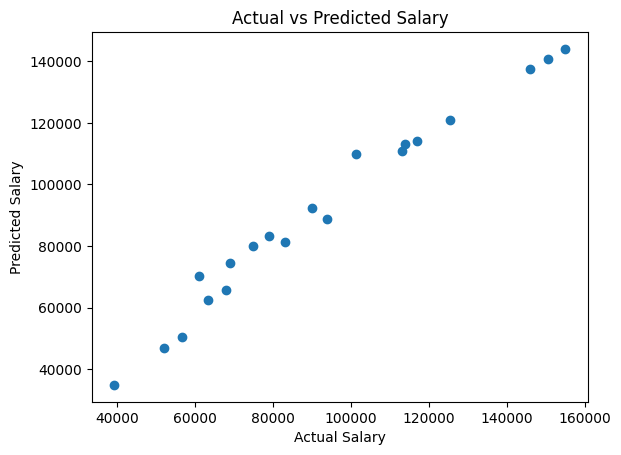

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.savefig("submission/actual_vs_pred.png")
plt.show()
